# Task-3 Iris Flower Classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Pre-Processing

In [5]:
#Check any null values...
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Check unique species...
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis

<AxesSubplot: xlabel='species', ylabel='count'>

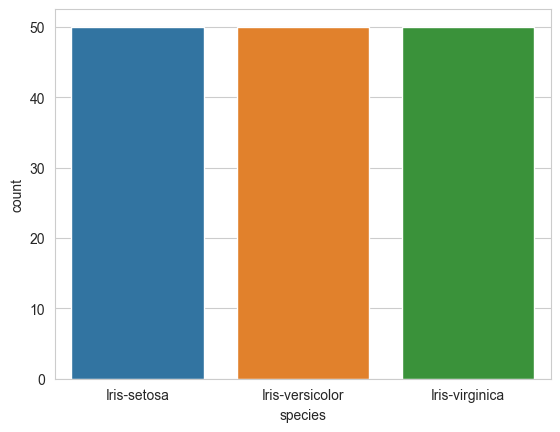

In [7]:
# Visualize the count of species...
sns.set_style("whitegrid")
sns.countplot(x="species",data=df)

## Observation:
    All species have equal no. of data

<AxesSubplot: xlabel='species', ylabel='sepal_length'>

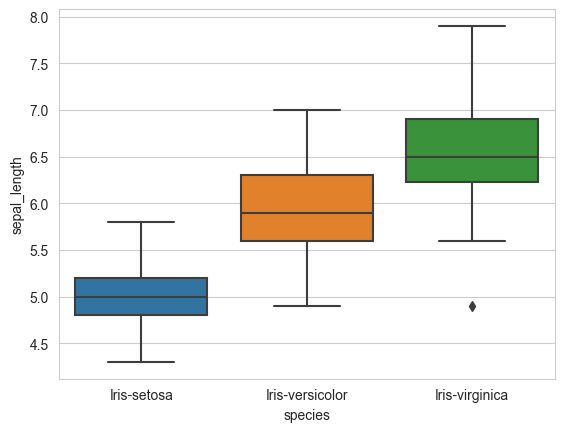

In [8]:
sns.boxplot(x="species",y="sepal_length",data=df)

<AxesSubplot: xlabel='species', ylabel='sepal_width'>

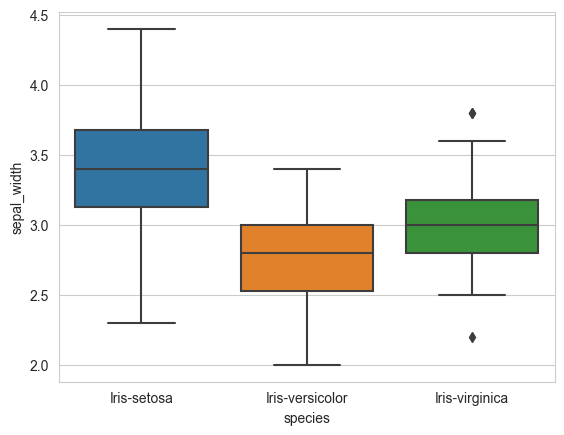

In [9]:
sns.boxplot(x="species",y="sepal_width",data=df)

<AxesSubplot: xlabel='petal_length', ylabel='petal_width'>

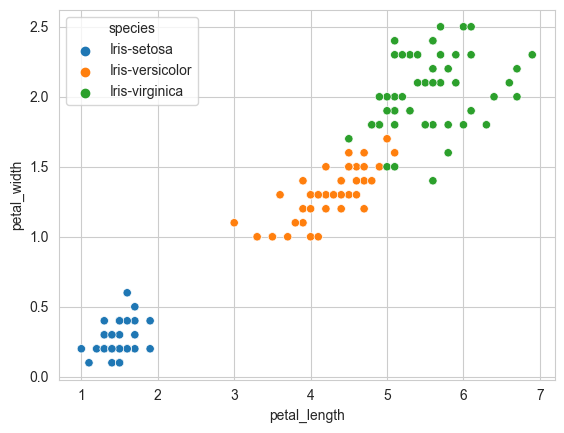

In [10]:
# visualize the petal length and petal width of different species...
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=df)

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

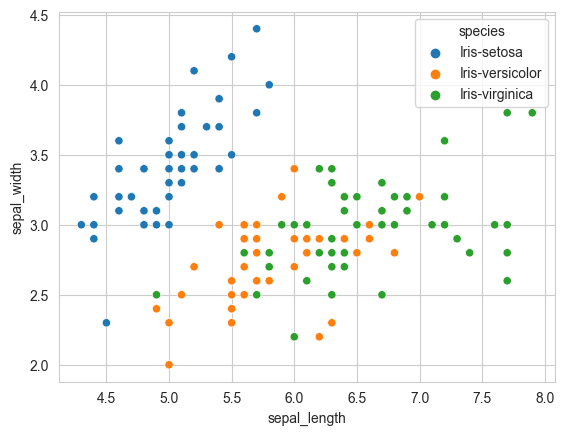

In [11]:
# visualize the sepal length and width of different species...
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df)

<AxesSubplot: xlabel='petal_length', ylabel='Density'>

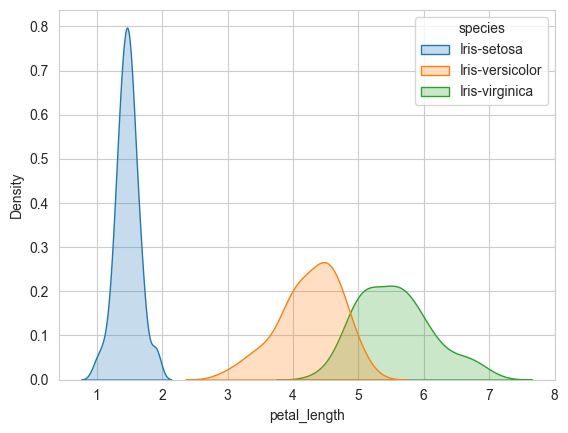

In [12]:
sns.kdeplot(data=df,x="petal_length",hue="species",fill=True)

## Observation:
    Iris-setosa have largest petal length than others.

<AxesSubplot: xlabel='sepal_length', ylabel='Density'>

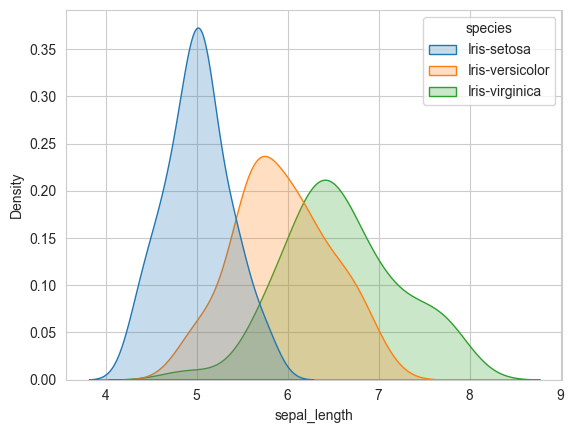

In [13]:
sns.kdeplot(data=df,x="sepal_length",hue="species",fill=True)

### Convert categorical data

In [14]:
# Handle feature -> species...
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
df["species"]=labelencoder.fit_transform(df["species"])
df.species.unique()

array([0, 1, 2])

In [16]:
x=df.drop("species",axis=1)
y=df["species"]

In [17]:
x.shape

(150, 4)

In [18]:
y.shape

(150,)

 Now our data is ready for train the model.

## Split the data

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=11)

## Train the model

In [20]:
# Support Vector Classifier ...
model1=SVC()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("Accuracy :",round(mt.accuracy_score(y_test,y_pred)*100,4))

Accuracy : 93.3333


In [21]:
# Random Forest Classifier...
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)
print("Accuracy :",round(mt.accuracy_score(y_test,y2_pred)*100,4))

Accuracy : 91.1111


In [22]:
# Decision Tree Classifier...
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)
print("Accuracy :",round(mt.accuracy_score(y_test,y3_pred)*100,4))

Accuracy : 91.1111


# Thanks